In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load daily revenue data
df = pd.read_csv('daily_revenue.csv', index_col='date', parse_dates=True, dayfirst=True)
df.head()

,revenue,discount_rate,coupon_rate
date,,,
2018-01-01,3316,0.2466,0.1563
2018-01-02,3206,0.2466,0.1563
2018-01-03,3381,0.2466,0.1563
2018-01-04,3573,0.2466,0.1563
2018-01-05,3239,0.2466,0.1563


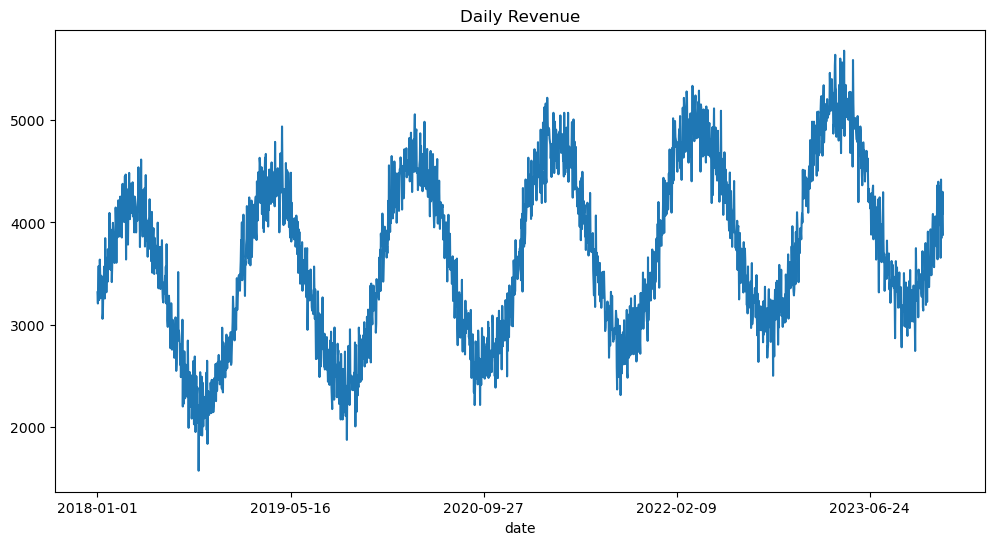

In [3]:
# plot daily revenue
df['revenue'].plot(title='Daily Revenue', figsize=(12, 6))
plt.show()

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

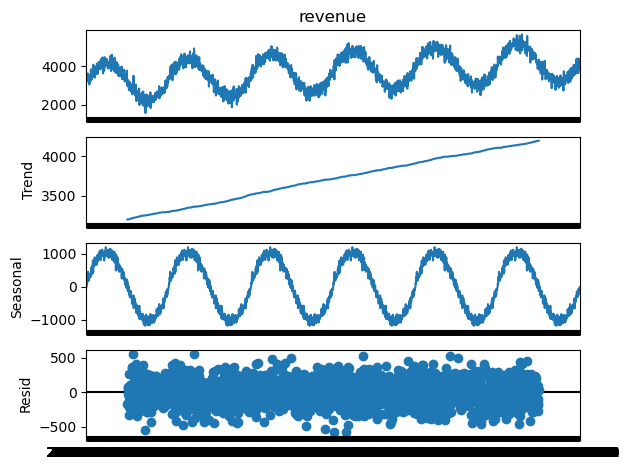

In [5]:
# Seasonal decomposition
# 7/365 for daily data, 24/7/365 for hourly data, 12 for monthly, 4 for quarterly
# Additive, multiplicative
seasonal_decompose(df['revenue'], model='additive', period=365).plot()
plt.show()

In [6]:
!pip install pmdarima

In [7]:
from pmdarima import auto_arima

In [10]:
#split into train and test
test_days = 31
train = df[:-test_days]
test = df[-test_days:]

In [11]:
# Arima model
model = auto_arima(train['revenue'], seasonal=False)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2160
Model:               SARIMAX(2, 1, 1)   Log Likelihood              -14675.744
Date:                Sun, 19 Jan 2025   AIC                          29359.487
Time:                        23:14:47   BIC                          29382.197
Sample:                    01-01-2018   HQIC                         29367.793
                         - 11-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0960      0.031     -3.100      0.002      -0.157      -0.035
ar.L2         -0.0679      0.029     -2.373      0.018      -0.124      -0.012
ma.L1         -0.7161      0.025    -28.087      0.0

In [12]:
# Prediction with arima
forecast = model.predict(n_periods=test_days)
print(forecast)

2023-12-01    3662.671182
2023-12-02    3684.877624
2023-12-03    3692.212934
2023-12-04    3690.000020
2023-12-05    3689.714024
2023-12-06    3689.891833
2023-12-07    3689.894199
2023-12-08    3689.881890
2023-12-09    3689.882911
2023-12-10    3689.883649
2023-12-11    3689.883509
2023-12-12    3689.883472
2023-12-13    3689.883485
2023-12-14    3689.883487
2023-12-15    3689.883486
2023-12-16    3689.883486
2023-12-17    3689.883486
2023-12-18    3689.883486
2023-12-19    3689.883486
2023-12-20    3689.883486
2023-12-21    3689.883486
2023-12-22    3689.883486
2023-12-23    3689.883486
2023-12-24    3689.883486
2023-12-25    3689.883486
2023-12-26    3689.883486
2023-12-27    3689.883486
2023-12-28    3689.883486
2023-12-29    3689.883486
2023-12-30    3689.883486
2023-12-31    3689.883486
Freq: D, dtype: float64


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Evaluation
mse = mean_squared_error(test['revenue'], forecast, squared=False)
mae = mean_absolute_error(test['revenue'], forecast, )
mape = mean_absolute_percentage_error(test['revenue'], forecast) * 100

print(f"Evaluation metrics: \nMSE: {mse:.0f}\nMAE: {mae:.0f}\nMAPE: {mape:.2f}%")

Evaluation metrics: 
MSE: 351
MAE: 288
MAPE: 7.03%


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [20]:
# SARIMA model
# 7 or 365 for daily data
model = auto_arima(train['revenue'], seasonal=True, m=7)
print(model.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                 2160
Model:             SARIMAX(2, 1, 1)x(1, 0, [1, 2], 7)   Log Likelihood              -14663.873
Date:                                Sun, 19 Jan 2025   AIC                          29341.745
Time:                                        23:28:43   BIC                          29381.487
Sample:                                    01-01-2018   HQIC                         29356.281
                                         - 11-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0725      0.029     -2.498      0.012      -0.129      -0.016
ar.

In [21]:
# Evaluation
forecast = model.predict(n_periods=test_days)
mse = mean_squared_error(test['revenue'], forecast, squared=False)
mae = mean_absolute_error(test['revenue'], forecast, )
mape = mean_absolute_percentage_error(test['revenue'], forecast) * 100
print(f"Evaluation metrics: \nMSE: {mse:.0f}\nMAE: {mae:.0f}\nMAPE: {mape:.2f}%")

Evaluation metrics: 
MSE: 336
MAE: 274
MAPE: 6.69%


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [22]:
# Regressors
X_train = train.iloc[:, 1:]
X_test = test.iloc[:, 1:]

In [23]:
# SARIMAX model
model = auto_arima(train['revenue'], seasonal=True, m=7, X=X_train)
print(model.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                 2160
Model:             SARIMAX(2, 1, 1)x(1, 0, [1, 2], 7)   Log Likelihood              -14661.606
Date:                                Sun, 19 Jan 2025   AIC                          29341.213
Time:                                        23:39:29   BIC                          29392.309
Sample:                                    01-01-2018   HQIC                         29359.902
                                         - 11-30-2023                                         
Covariance Type:                                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
discount_rate  -298.2003     92.240     -3.233      0.001    -478.987    -11

In [24]:
# Prediction with SARIMAX
forecast = model.predict(n_periods=test_days, X=X_test)
mse = mean_squared_error(test['revenue'], forecast, squared=False)
mae = mean_absolute_error(test['revenue'], forecast, )
mape = mean_absolute_percentage_error(test['revenue'], forecast) * 100
print(f"Evaluation metrics: \nMSE: {mse:.0f}\nMAE: {mae:.0f}\nMAPE: {mape:.2f}%")

Evaluation metrics: 
MSE: 387
MAE: 316
MAPE: 7.71%


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
